In [2]:
import numpy as np
import matplotlib.pyplot as plt

from abtem.ionization import SubshellTransitions, TransitionPotential, EELSDetector
from abtem import SMatrix, Potential, GridScan
from ase import units
from ase.io import read

In [4]:
Z = 13 # atomic number
n = 2 # principal quantum number
l = 1 # azimuthal quantum number
order =1
gpernode =150
xc = 'PBE' # exchange-correlation functional

transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = 'PBE',epsilon=1,order=order,gpernode=gpernode)

print('bound electron configuration:', transitions.bound_configuration)
print('ionic electron configuration:', transitions.excited_configuration)

bound electron configuration: 1s2 2s2 2p6 3s2 3p1
ionic electron configuration: 1s2 2s2 2p5 3s2 3p1


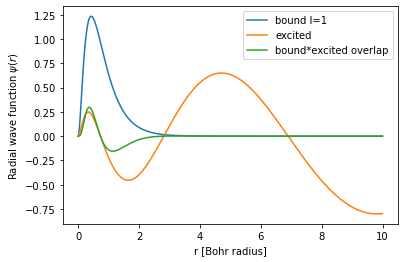

In [24]:
r = np.geomspace(1e-20, 10, 100000)
bound=transitions.get_bound_wave()(r)
transitions2 = SubshellTransitions(Z = Z, n = n, l = 0, xc = 'PBE',epsilon=1,order=order,gpernode=gpernode)
bound2 = transitions2.get_bound_wave()(r)
excited=transitions.get_continuum_waves()[1](r)
plt.plot(r,bound,label='bound l=1')
# plt.plot(r,bound2,label='bound l=0')
plt.plot(r,excited,label='excited')
plt.plot(r,bound*excited,label='bound*excited overlap')
# plt.plot(r,bound*bound2,label='bound*bound2')
plt.xlabel('r [Bohr radius]')
plt.ylabel('Radial wave function $\psi(r)$')
plt.legend()

In [33]:
# test if the Dirac aslo gives the non-zero value for q=0
from pyms.Ionization import orbital 
from abtem.ionization.utils import check_valid_quantum_number, config_str_to_config_tuples, \
    remove_electron_from_config_str, load_electronic_configurations
from ase.data import chemical_symbols


config_tuples = config_str_to_config_tuples(load_electronic_configurations()[chemical_symbols[transitions.Z]])
bound_config = ' '.join(["".join(str(n)+["s","p","d","f"][l]+str(f)) for n,l,f in config_tuples]) 
excited_config = []
for n,l,f in config_tuples:
    if n == transitions.n and l == transitions.l:
        excited_config.append(str(n)+["s","p","d","f"][l]+str(f-1))
    else:
        excited_config.append(str(n)+["s","p","d","f"][l]+str(f))
excited_config = ' '.join(excited_config)
bound_wave = orbital(transitions.Z,bound_config,transitions.n,transitions.l)
continuum_waves = []
for lprime in transitions.lprimes:
    continuum_waves.append(orbital(transitions.Z,excited_config,n=0,ell=lprime,epsilon=transitions.epsilon))

import quadpy
from scipy.special import spherical_jn
from ase import units
k=np.geomspace(1e-20, 10, 10000)
grid = 2 * np.pi * k * units.Bohr

val, error_estimate = quadpy.c1.integrate_adaptive(
    lambda r: bound_wave(r)*continuum_waves[1](r)*spherical_jn(0,grid[:, None] * r[None]), [0.0, 100], 1.0e-10)
plt.plot(k,val)

-0.02136617047230913


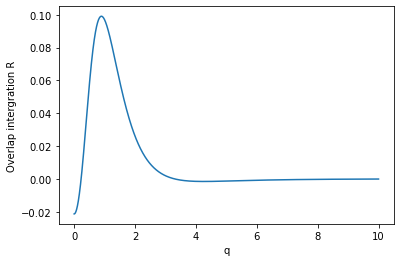

In [25]:
import quadpy
from scipy.special import spherical_jn
from ase import units
k=np.geomspace(1e-20, 10, 10000)
grid = 2 * np.pi * k * units.Bohr

val, error_estimate = quadpy.c1.integrate_adaptive(
    lambda r: transitions.get_bound_wave()(r)*transitions.get_continuum_waves()[1](r)*spherical_jn(0,grid[:, None] * r[None]), [0.0, 100], 1.0e-10)
plt.plot(k,val)
plt.xlabel('q')
plt.ylabel('Overlap intergration R')
print(val[0])


In [21]:
val, error_estimate = quadpy.c1.integrate_adaptive(
    lambda r: transitions.get_continuum_waves()[0](r)*transitions.get_continuum_waves()[1](r), [0.0, 100], eps_rel=1.0e-10)
val

-26.123597501869334

In [8]:
val, error_estimate = quadpy.c1.integrate_adaptive(
    lambda r: transitions.get_bound_wave()(r)*transitions.get_continuum_waves()[1](r), [0.0, 10], eps_rel=1.0e-10)
val

-0.0213661698025261






Transitions: 100%|██████████| 3/3 [00:17<00:00,  5.83s/it]


Transitions:   0%|          | 0/3 [1:09:23<?, ?it/s]


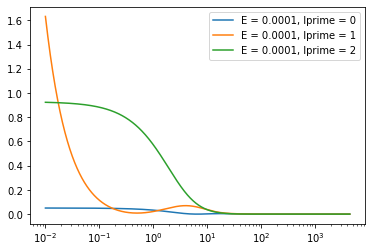

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from abtem.ionization import SubshellTransitions, TransitionPotential, EELSDetector
from abtem import SMatrix, Potential, GridScan
from ase import units
from ase.io import read

Z = 13 # atomic number
n = 2 # principal quantum number
l = 1 # azimuthal quantum number
order =1
gpernode =150
xc = 'PBE' # exchange-correlation functional

for e in [0.0001]:
    transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = 'PBE',epsilon=e*units.Rydberg,order=order)
    gos,k = transitions.get_gos(dirac=False)
    index = (units.Bohr*k)**2>0.01
    for lp in range(3):
        # plt.plot(((new_k[index])**2),np.sum(gos[:],axis=0)[index],label=f'E = {e}')
        plt.plot(((k[index]*units.Bohr)**2),gos[lp][index],label=f'E = {e}, lprime = {lp}')
plt.xscale('log')
plt.legend()

Transitions: 100%|██████████| 3/3 [00:10<00:00,  3.47s/it]


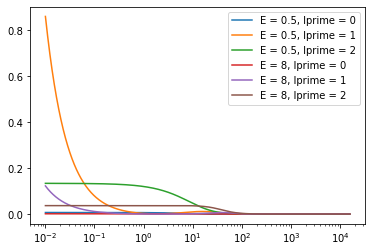

In [4]:
for e in [0.5,8]:
    transitions = SubshellTransitions(Z = Z, n = n, l = l, xc = 'PBE',epsilon=e*units.Rydberg,order=order)
    gos,k = transitions.get_gos(dirac=False)
    new_k = k*2*np.pi
    index = (new_k)**2>0.01
    for lp in range(3):
        # plt.plot(((new_k[index])**2),np.sum(gos[:],axis=0)[index],label=f'E = {e}')
        plt.plot(((new_k[index])**2),gos[lp][index],label=f'E = {e}, lprime = {lp}')
plt.xscale('log')
plt.legend()

In [14]:
from sympy.physics.wigner import wigner_3j
float(wigner_3j(0,0,0, 0, 0, 0))**2

1.0

In [15]:
wigner_3j(0,0,0, 0, 0, 0)

1

In [ ]:
kmax=20
kgpts=1024
k = np.geomspace(1e-7,kmax,num=kgpts)

In [ ]:
plt.plot(np.log(k),np.sum(gos,axis=0))

In [ ]:
for i in range(4):
    plt.plot(np.real(gos[i]))

In [ ]:
r = np.linspace(0, 10, 10000)
r[None]

In [ ]:
1/(10/1024)/2

In [ ]:
units.Bohr

In [ ]:
plt.plot(np.sum(np.real(gos),axis=0)[:10])

In [ ]:
plt.plot(np.real(gos[4]))

In [ ]:
atomic_transition_potentials = transitions.get_transition_potentials(extent = 1,
                                                                       gpts = 256,
                                                                       energy = 100e3)

fig, axes = plt.subplots(1,4, figsize = (20,5))

for ax, atomic_transition_potential in zip(axes, atomic_transition_potentials):
    # print(str(atomic_transition_potential))
    atomic_transition_potential.show(ax = ax, title = str(atomic_transition_potential),cbar=True)